In [22]:
import pandas as pd
df = pd.read_csv("titanic_dataset.csv")

In [23]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.drop(["PassengerId","Name","SibSp","Parch","Embarked","Cabin","Ticket"],axis="columns", inplace = True)

In [25]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [26]:
target = df["Survived"]

In [27]:
target.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
df.drop(["Survived"],axis = "columns",inplace = True)

In [32]:
df.head(5)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [34]:
dummies = pd.get_dummies(df["Sex"])

In [35]:
dummies.head(5)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [36]:
df = pd.concat([dummies,df],axis=True)

In [37]:
df.head(5)

,female,male,Pclass,Sex,Age,Fare
0,False,True,3,male,22.0,7.2500
1,True,False,1,female,38.0,71.2833
2,True,False,3,female,26.0,7.9250
3,True,False,1,female,35.0,53.1000
4,False,True,3,male,35.0,8.0500


In [39]:
df.drop(["Sex"],axis=True, inplace=True)

In [40]:
df.head(10)

,female,male,Pclass,Age,Fare
0,False,True,3,22.0,7.2500
1,True,False,1,38.0,71.2833
2,True,False,3,26.0,7.9250
3,True,False,1,35.0,53.1000
4,False,True,3,35.0,8.0500
5,False,True,3,NaN,8.4583
6,False,True,1,54.0,51.8625
7,False,True,3,2.0,21.0750
8,True,False,3,27.0,11.1333
9,True,False,2,14.0,30.0708


In [53]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [54]:
df.head(10)

,female,male,Pclass,Age,Fare
0,False,True,3,22.000000,7.2500
1,True,False,1,38.000000,71.2833
2,True,False,3,26.000000,7.9250
3,True,False,1,35.000000,53.1000
4,False,True,3,35.000000,8.0500
5,False,True,3,29.699118,8.4583
6,False,True,1,54.000000,51.8625
7,False,True,3,2.000000,21.0750
8,True,False,3,27.000000,11.1333
9,True,False,2,14.000000,30.0708


In [55]:
from sklearn.model_selection import train_test_split
X_test, X_train, Y_test, Y_train = train_test_split(df,target,test_size = 0.2)

In [57]:
len(X_test)

712

In [58]:
len(X_train)

179

In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [62]:
model.fit(df,target)

GaussianNB()

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7823033707865169

In [69]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1])

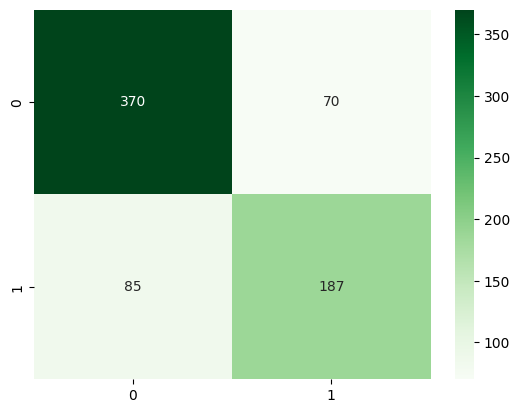

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = "d")
plt.show()